# ADMIXTURE

## General Settings

In [4]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

% run general_settings.py
# ^ Takes ~20s to run if it finds the dumpfiles
# ^ WARNING: It will hog ~2.02 Gb RAM

% run datasets_settings.py
# ^ Will take another ~20s

! echo; wc -l /home/juan/tesina/dataset_dumps/*.samples

/home/juan/anaconda3/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
/home/juan/repos/tesina/panels/genome.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  centromers["chromosome"] = [i.replace("CEN", "") for i in centromers.index]


[17:04:24] 'panels' dict
[17:04:24] 'galanter', 'present', 'missing' dataframes
[17:04:24] 'panel_labels'
[17:04:24] 'panel_names' dict
[17:04:24] 'panel_rsIDs' dict
[17:04:24] 'genome' dataframe
[17:04:30] 'lat' dataframe
[17:04:44] 'control_genotypes' huge datagrame
[17:04:44] 'control_rsIDs' dict to filter it ^
[17:04:44] 'cp_factors' list
[17:04:44] 'control_labels'
[17:04:44] 'control_names' dict
[17:04:44] 'df_1000G_samples'
[17:04:44] 'df_1000G_SNPs'
[17:04:44] 'df_1000G_genotypes'
[17:04:44] 'df_1000G_populations'
[17:04:44] 'df_1000G_genotypes_alleles'
[17:04:45] 'mafs' dataframe
[17:04:45] 'dataset_names'
[17:04:45] 'dataset_populations'
[17:04:45] 'dataset_samples' created and written to files
[17:04:55] 'ancestries_df' read from ADMIXTURE results

  346 /home/juan/tesina/dataset_dumps/L.samples
  544 /home/juan/tesina/dataset_dumps/LE.samples
  751 /home/juan/tesina/dataset_dumps/LEA.samples
  959 /home/juan/tesina/dataset_dumps/LEAC.samples
 1062 /home/juan/tesina/dataset_

/home/juan/anaconda3/lib/python3.5/site-packages/pandas/io/parsers.py:1588: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/juan/anaconda3/lib/python3.5/site-packages/pandas/io/parsers.py:1590: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


* En `./dataset_dumps/` están los archivos `.samples` con los sample IDs de 1000 Genomas para cada dataset (`L`, `LE`, `LEA` ...). En `../1000Genomes/galanter_beds` están los archivos (`.bed`, `.bim` ...) de PLINK de cada panel (GALs y CPs).
* Copié tanto los `.samples` como los bedfiles a `~/tesina/admixture` (con `./0_bring_the_panel_bedfiles.sh`) y corrí `1_create_datasets_run_admixture.sh panel_label_1 panel_label_2 ..`. Se crean automáticamente directorios por cada combineta de dataset + panel con los archivos `.P` y `.Q`
* Finalmente corrí `2_generate_CV_errors`.

## CV Errors

### Plot the CV errors per dataset / per panel

In [1]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from plotters.admixture_cv_errors import AdmixtureCVErrors


sns.set_context("notebook")
sns.set_style("white")

admixture_cv_errors = AdmixtureCVErrors()
cv_errors = admixture_cv_errors.read_cv_errors()

idx = pd.IndexSlice
gal_panels_cv_error = cv_errors.loc[idx[:, ["GAL_Completo", "GAL_Affy", "GAL_Faltantes"]], :]
cp_panels_cv_error = cv_errors.loc[idx[:, ["CPx1", "CPx10", "CPx100"]], :]

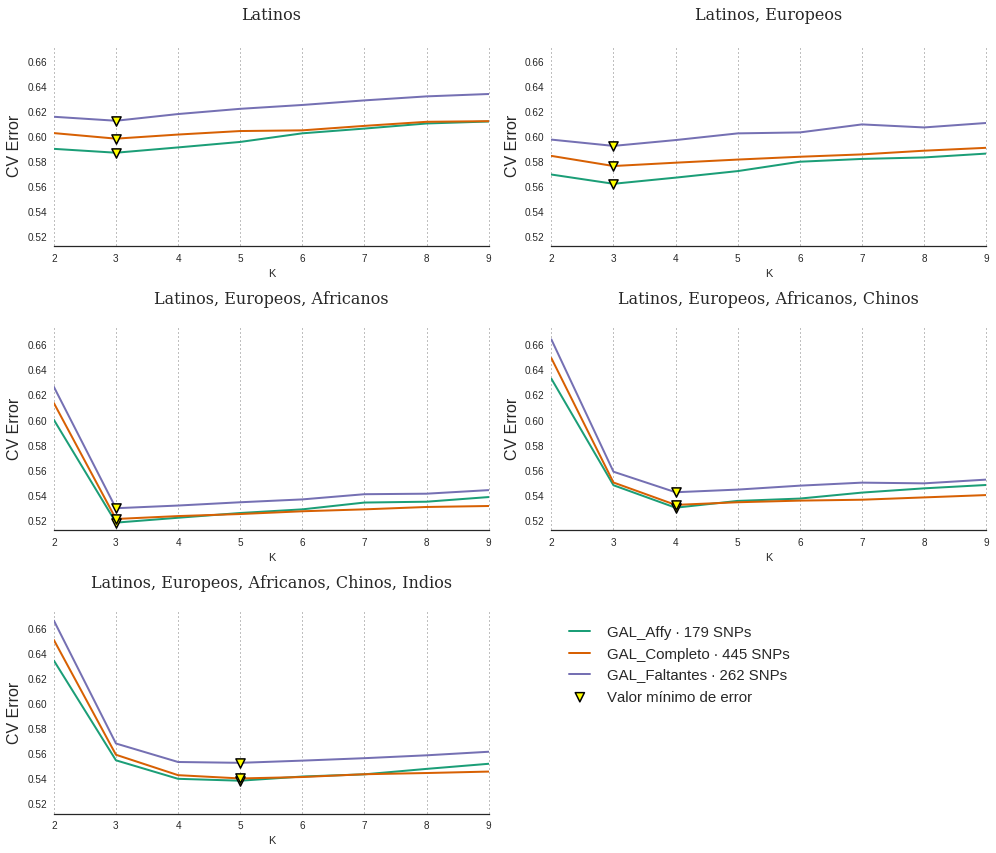

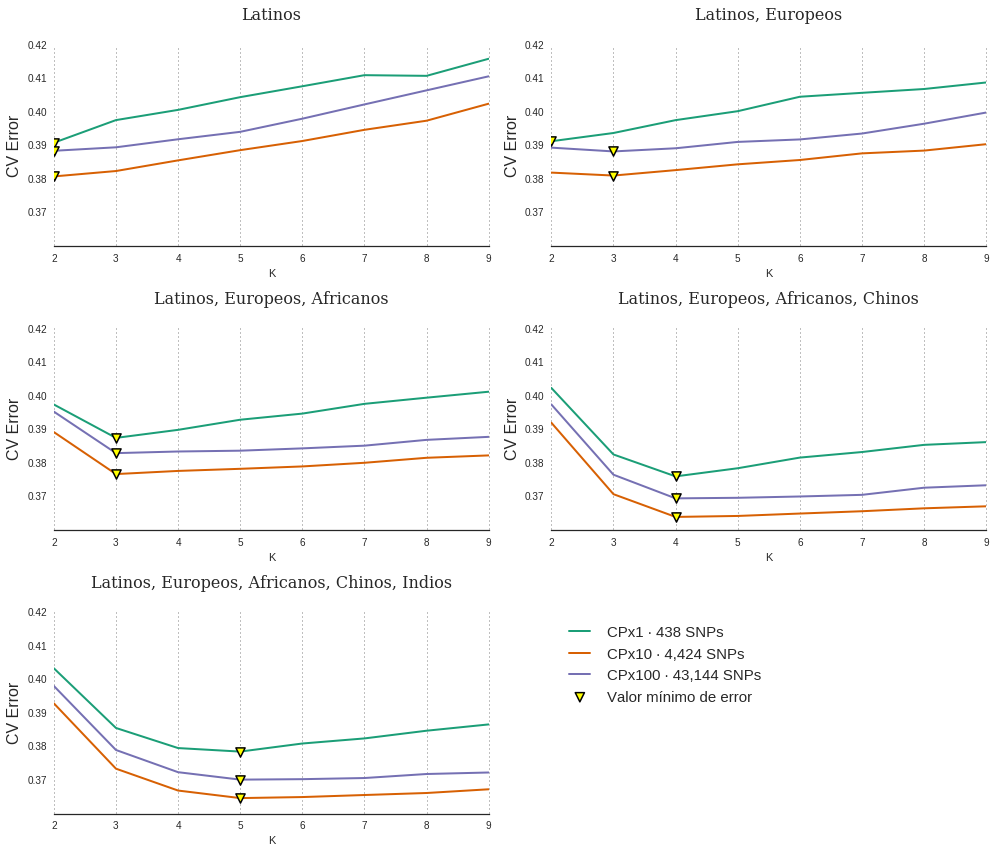

In [3]:
labels = ["CV_errors_GAL", "CV_errors_CPx"]
panel_groups = [gal_panels_cv_error, cp_panels_cv_error]

for filename, panel_group in zip(labels, panel_groups):
    ax = admixture_cv_errors.plot(filename, panel_group)
    plt.show()

## Ancestry ratios per population (mean) and per individual sample

In [4]:
%%time

from admixture.results import AdmixtureResults

admix_results = AdmixtureResults()
ancestries_df = admix_results.read_ancestry_files()

CPU times: user 16.7 s, sys: 76 ms, total: 16.8 s
Wall time: 17.1 s


In [5]:
%%time

import seaborn as sns
from plotters.admixture_ancestries import AdmixtureAncestries

sns.set_context("notebook", font_scale=1.5)
sns.set_style("white")

admix_plotter = AdmixtureAncestries()

# # debug or show as example
# K, p, d = 5, "CPx100", "LEACI"
# admix_plotter.plot_per_sample(d, K, p, ancestries_df)
# admix_plotter.plot_population_means(d, K, p, ancestries_df)

# Rerun this line in case you wanna replot population ancestries means:
admix_plotter.plot_all(ancestries_df)

/home/juan/repos/tesina/plotters/admixture_ancestries.py:61: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_lite = ancestries_df.loc[dataset_label, K, panel_label]
/home/juan/repos/tesina/plotters/admixture_ancestries.py:21: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_lite = ancestries_df.loc[dataset_label, K, panel_label].dropna(axis=1)


CPU times: user 44min 23s, sys: 3.28 s, total: 44min 26s
Wall time: 44min 29s


/home/juan/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


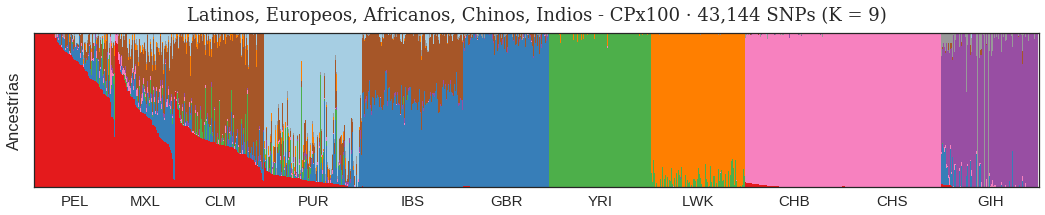

In [6]:
from IPython.display import Image
from os.path import join

panel, dataset, K = "CPx100", "LEACI", 9
filedir = "/home/juan/tesina/charts/ADMIXTURE/"
filename = "{0}__{1}/{1}__{0}__{2}".format(panel, dataset, K)

Image(join(filedir, filename + "__samples.png"))

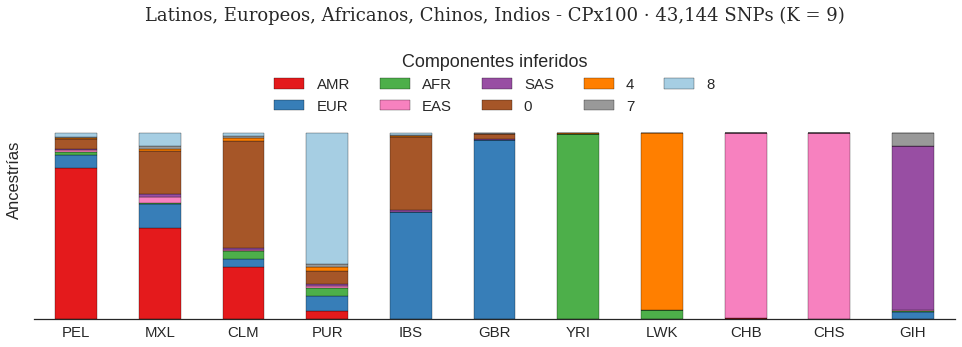

In [7]:
Image(join(filedir, filename + "__means.png"))

# Ternary plots

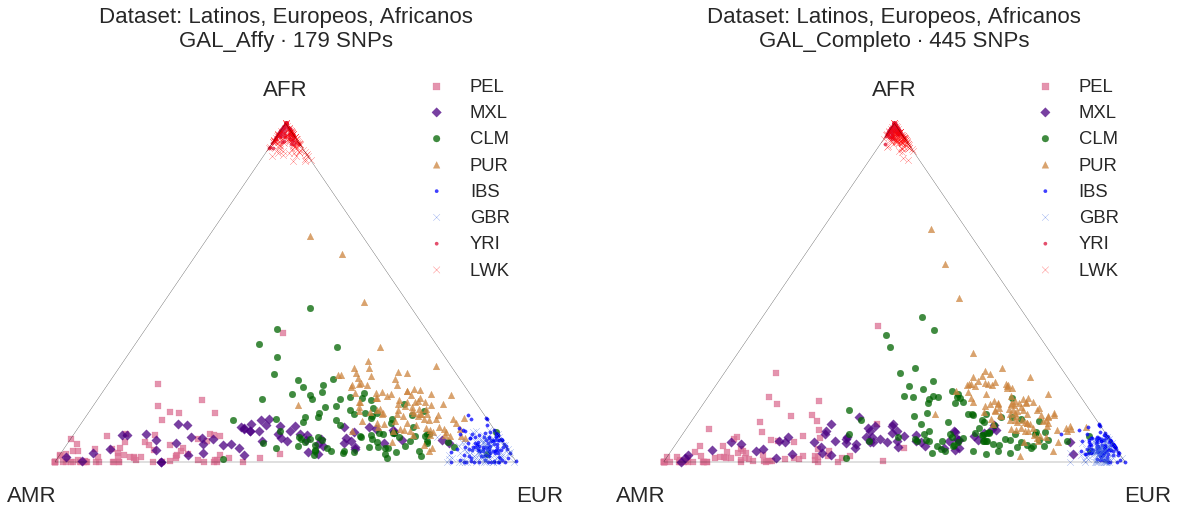

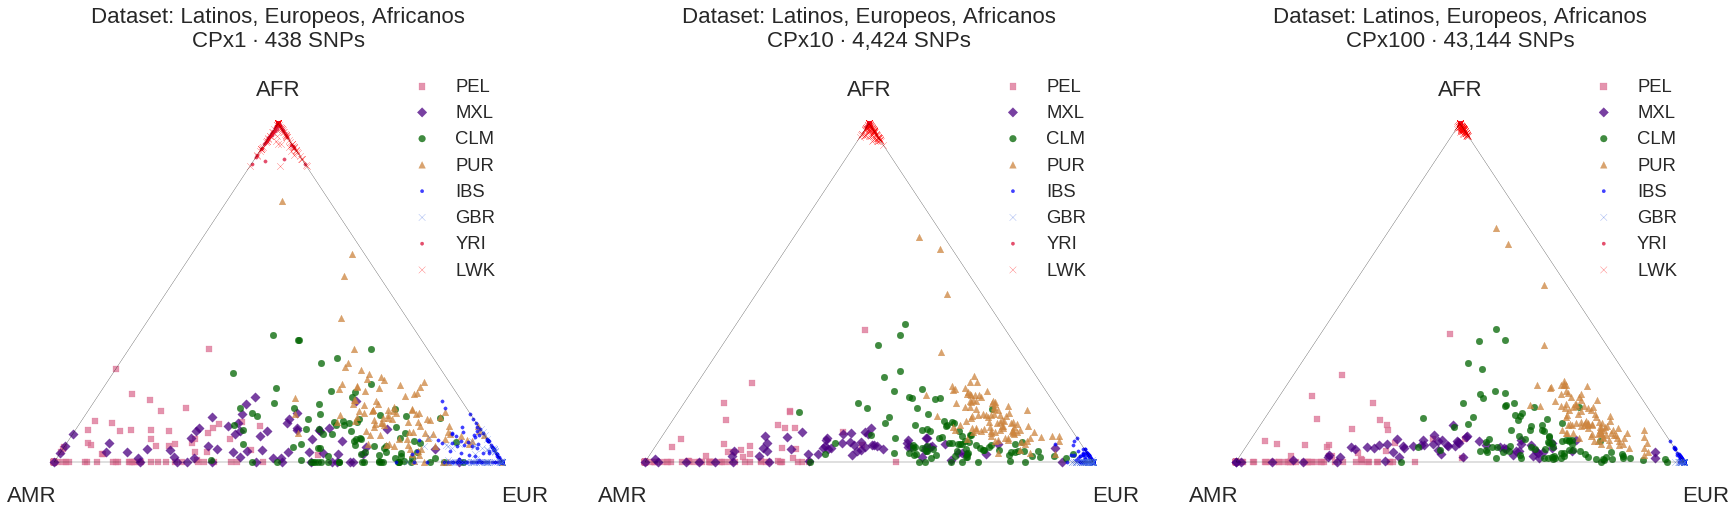

In [8]:
import pandas as pd
import seaborn as sns

from components.panel import Panel
from components.dataset import Dataset
from plotters.ancestries_triangle_plotter import AncestriesTrianglePlotter


sns.set_context("notebook", font_scale=1.85)
sns.set_style("white")


triangle_plotter = AncestriesTrianglePlotter()
idx = pd.IndexSlice
dataset = Dataset("LEA")

for panel_group_label, panel_group in Panel.panel_groups().items():
    if panel_group_label == "subpanels":
        continue
    if panel_group_label == "panels":
        panel_group = [p for p in panel_group if not "Faltantes" in p.label]

    panel_labels = [panel.label for panel in panel_group]
    
    # Choose the dataset / panels to plot
    df = ancestries_df.sort_index().loc[idx[dataset.label, 3, panel_labels], :]   
    filename = "ternary_plot_of_ancestries__{}_{}".format(dataset.label, panel_group_label)
    triangle_plotter.plot(filename, panel_group, df)

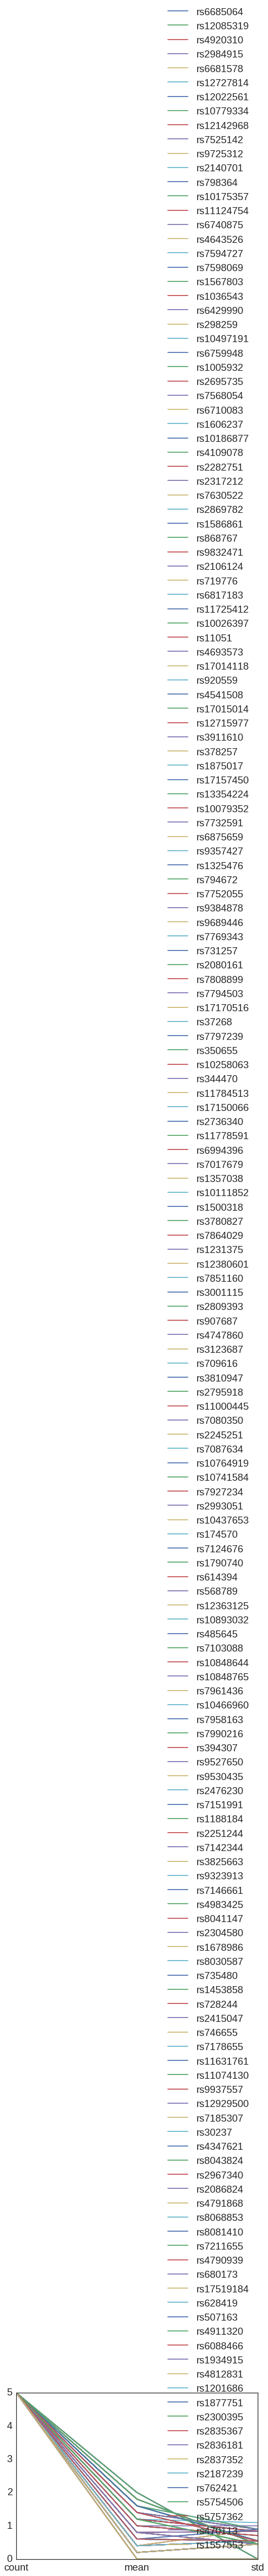

In [30]:
from components.panel import Panel


ax = Panel("GAL_Affy").genotypes_1000G().head().describe().ix[:3].plot()

In [33]:
ax.get_legend_handles_labels()

([<matplotlib.lines.Line2D at 0x7f28806cc2e8>,
 ['rs6685064',
  'rs12085319',
  'rs4920310',
  'rs2984915',
  'rs6681578',
  'rs12727814',
  'rs12022561',
  'rs10779334',
  'rs12142968',
  'rs7525142',
  'rs9725312',
  'rs2140701',
  'rs798364',
  'rs10175357',
  'rs11124754',
  'rs6740875',
  'rs4643526',
  'rs7594727',
  'rs7598069',
  'rs1567803',
  'rs1036543',
  'rs6429990',
  'rs298259',
  'rs10497191',
  'rs6759948',
  'rs1005932',
  'rs2695735',
  'rs7568054',
  'rs6710083',
  'rs1606237',
  'rs10186877',
  'rs4109078',
  'rs2282751',
  'rs2317212',
  'rs7630522',
  'rs2869782',
  'rs1586861',
  'rs868767',
  'rs9832471',
  'rs2106124',
  'rs719776',
  'rs6817183',
  'rs11725412',
  'rs10026397',
  'rs11051',
  'rs4693573',
  'rs17014118',
  'rs920559',
  'rs4541508',
  'rs17015014',
  'rs12715977',
  'rs3911610',
  'rs378257',
  'rs1875017',
  'rs17157450',
  'rs13354224',
  'rs10079352',
  'rs7732591',
  'rs6875659',
  'rs9357427',
  'rs1325476',
  'rs794672',
  'rs7752055',
